# Karan Kumar 6380812

## Hough Transform to count number of coins in an image

In [227]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

### Reading image

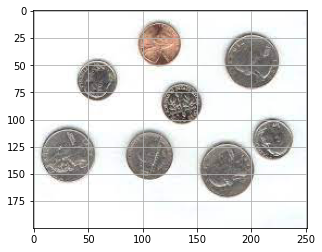

In [228]:
coins = plt.imread('assets/coin_sample1.jpeg')
coins2 = plt.imread('assets/coin_sample2.jpeg')
coins3 = plt.imread('assets/coin_sample3.jpeg')

plt.imshow(coins)
plt.grid()

### Grayscale and blur the image

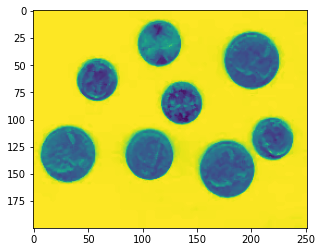

In [229]:
def grayscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def blur_image(image, blur_value):
    return cv2.medianBlur(image, blur_value)

sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
plt.imshow(sample_image_gray_blur)

### Detect edeges using Canny edge detector

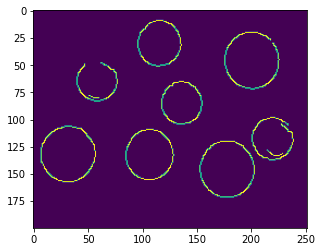

In [230]:
def edge_detect(image, min_val, max_val):
    return cv2.Canny(image, min_val, max_val)

sample_image_canny = edge_detect(sample_image_gray_blur, 250, 500)
plt.imshow(sample_image_canny)

### Using Hough Circle Transform with OpenCV

In [231]:
def hough_circle_opencv(coin_image_gb, dp, min_dist, param1, param2):
    circles = cv2.HoughCircles(coin_image_gb,cv2.HOUGH_GRADIENT,dp,min_dist, param1=param1,  # Gradient value passed to edge detection
        param2=param2)
    return circles

### Let's try it on our sample images

### Image 1:

In [232]:
sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
sample_image_gray_blur_canny = edge_detect(sample_image_gray_blur, 250, 500)
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 8.0'

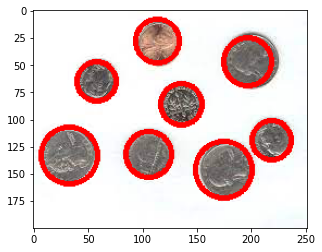

In [233]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins, (x,y), r, (255,0,0), 4)

plt.imshow(coins)

### Image 2:

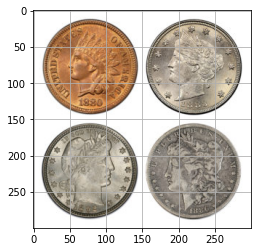

In [234]:
plt.imshow(coins2)
plt.grid()

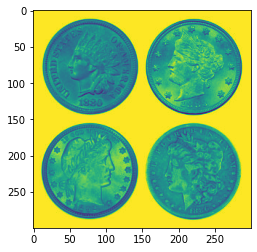

In [235]:
sample_image_gray_blur = blur_image(grayscale_image(coins2), 1)
plt.imshow(sample_image_gray_blur)

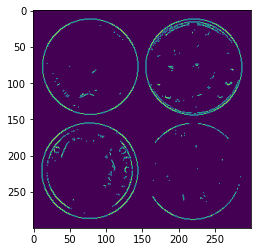

In [236]:
sample_image_gray_blur_canny2 = edge_detect(sample_image_gray_blur, 470, 500)
plt.imshow(sample_image_gray_blur_canny2)

In [237]:
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny2, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 4.0'

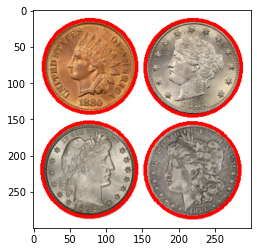

In [238]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins2, (x,y), r, (255,0,0), 4)

plt.imshow(coins2)

## Let's use our own Hough Circle Implementation

### Drawing circle function

(0.0, 40.0)

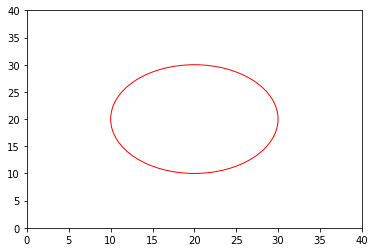

In [239]:
def draw_circle(cx, cy, r):
    Drawing_color_circle = plt.Circle((cx, cy), r, color='red', fill=False)
    axes = plt.gca()
    axes.add_artist(Drawing_color_circle)

draw_circle(20,20,10)
plt.xlim(0,40)
plt.ylim(0,40)

## Parametrize a circle

### Generate candidates for circle

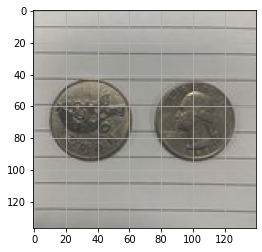

In [240]:
plt.imshow(coins3)
plt.grid()

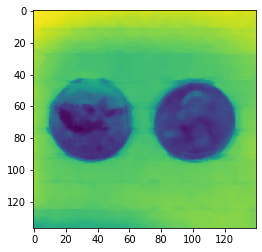

In [241]:
blurred = blur_image(grayscale_image(coins3), 5)
plt.imshow(blurred)

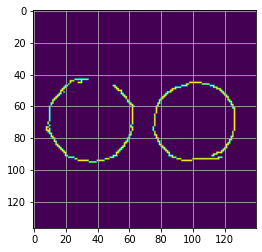

In [242]:
sample_image_canny2 = edge_detect(blurred, 70, 175)

plt.imshow(sample_image_canny2)
plt.grid()

## Get the edges' coordinate

In [243]:
def get_edges(canny_img):
    indices = np.where(canny_img != 0)
    coordinates = zip(indices[1], indices[0])
    return list(coordinates)

In [244]:
coords = get_edges(sample_image_canny2)

coords[55]

(18, 49)

## Accumulate

In [245]:
height, width = sample_image_canny2.shape[:2]
height, width

(137, 140)

In [246]:
r_min = 20
r_max = 60
n_r = range(r_min, r_max+1)
#n_r = int(np.round(np.sqrt(height**2 + width**2)))

acc = np.zeros((height,width,(r_max-r_min)+1))

for r in range(r_min, r_max):
    for d in coords:
        x = d[0]
        y = d[1]
        for theta in range(0,361):
            a = x - int(r*np.cos(theta * (np.pi/180)))
            b = y - int(r*np.sin(theta * (np.pi/180)))
            if a+r < width and b+r< height:
                acc[b,a,r-r_min] += 1

KeyboardInterrupt: 

## Find Peak

In [ ]:
np.max(acc)

247.0

In [ ]:
good_circles = []
threshold_value = 202
for y in range(height):
    for x in range(width):
        for r in range(r_min, r_max):
            if acc[y,x,r-r_min] >= threshold_value:
                good_circles += [(x,y,r)]

good_circles

[(36, 69, 27), (101, 70, 26)]

## We have detected the coins let's draw it! 

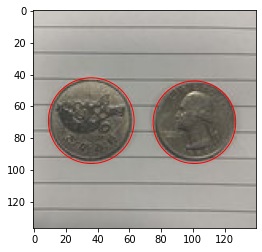

In [ ]:
coins = plt.imread('assets/coin_sample3.jpeg')
plt.imshow(coins)
plt.gca()

for gc in good_circles:
    draw_circle(gc[0], gc[1], gc[2])

# Let's combine our manual hough transform into one entire function

In [ ]:
def hough_transform_circle_manual(canny_img, min_radius, max_radius, threshold_value):
    # get the edges coordinate in the canny image
    edges_coords = get_edges(canny_img)

    height, width = canny_img.shape[:2]

    #creating the accumulator to store all the votes
    acc = np.zeros((height,width,(max_radius-min_radius)+1))

    # loop through all the edges coordinate to fill up the votes
    for r in range(min_radius, max_radius):
        for ec in edges_coords:
            x = ec[0]
            y = ec[1]
            for theta in range(0,361):
                a = x - int(r*np.cos(theta * (np.pi/180)))
                b = y - int(r*np.sin(theta * (np.pi/180)))
                if a+r < width and b+r< height:
                    acc[b,a,r-min_radius] += 1
    
    # filter the votes by a certain threshold value to get possible circles that detected the coins
    # successfully
    good_circles = []
    for y in range(height):
        for x in range(width):
            for r in range(min_radius, max_radius):
                if acc[y,x,r-min_radius] >= threshold_value:
                    good_circles += [(x,y,r)]
    
    return good_circles


<p> Let's test on our sample images </p>

In [255]:
output_manual = hough_transform_circle_manual(sample_image_gray_blur_canny, 5, 60, 175)
output_manual

[(115, 30, 21),
 (116, 30, 21),
 (201, 45, 26),
 (201, 46, 26),
 (201, 47, 25),
 (58, 65, 19),
 (136, 85, 19),
 (136, 85, 20),
 (137, 85, 20),
 (136, 86, 19),
 (220, 117, 20),
 (220, 118, 20),
 (32, 131, 26),
 (31, 132, 26),
 (32, 132, 26),
 (106, 132, 23),
 (107, 132, 23),
 (107, 133, 23),
 (178, 145, 26),
 (178, 146, 26)]

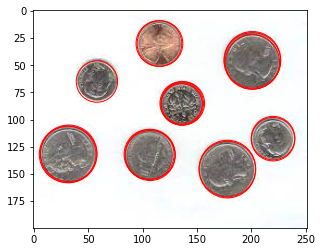

In [256]:
coins = plt.imread('assets/coin_sample1.jpeg')
plt.imshow(coins)
plt.gca()

for gc in output_manual:
    draw_circle(gc[0], gc[1], gc[2])

## Let's try to differentiate between different coins

### Since we live in Thailand, let's do it for thai coins

<p> Thai coins working with: 25 satang, 50 satang, 1 baht, 2 baht, 5 baht and 10 bath </p>

<p> Since we are not working any deep learning models for this coin identification to work, the user must tell what all thai coins are in the picture before hand </p>

<p> Expected format </p>
```python3
coins_in_picture = [1,5,10]
```
<p> This lets the program only the coins 1, 5 and 10 baht are in the picture

In [321]:
database_thai_baht = {
    0.25: 15,
    0.5: 18,
    1: 20,
    2: 21.75,
    5: 24,
    10: 26
}

#### First let's get our sample image and detect those coins!

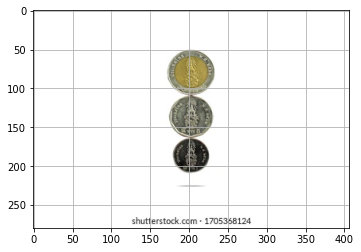

In [329]:
coin_thai = plt.imread('assets/coin_sample5.webp')
plt.imshow(coin_thai)
plt.grid()

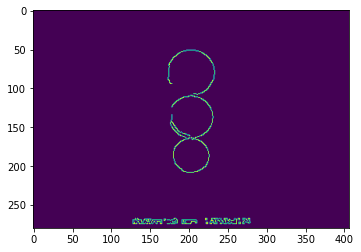

In [338]:
thai_coin_blur = blur_image(grayscale_image(coin_thai), 3)
thai_coin_blur_canny = edge_detect(thai_coin_blur, 200, 500)

plt.imshow(thai_coin_blur_canny)

In [339]:
output_thai_coin_manual = hough_transform_circle_manual(thai_coin_blur_canny, 7, 60, 183)
output_thai_coin_manual

[(203, 80, 30), (202, 137, 28), (203, 137, 28), (202, 186, 23), (203, 186, 23)]

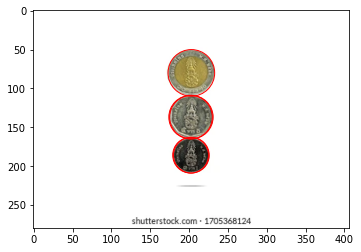

In [340]:
coins = plt.imread('assets/coin_sample5.webp')
plt.imshow(coins)
plt.gca()

for gc in output_thai_coin_manual:
    draw_circle(gc[0], gc[1], gc[2])

In [341]:
sample_input = [1,5,10]
tolerance = 0.02
sample_input_sorted = sorted(sample_input)
min_coin_radius = database_thai_baht[sample_input_sorted[0]]

ratio_dict = { r:database_thai_baht[r]/min_coin_radius for r in sample_input_sorted }
ratio_dict

{1: 1.0, 5: 1.2, 10: 1.3}

In [342]:
rs = []

for dc in output_thai_coin_manual:
    rs += [dc[2]]

# the min radius found should corresspond to the small coin that was given in the smallest input
min_radius = min(rs)
min_radius

23

<AxesSubplot:>

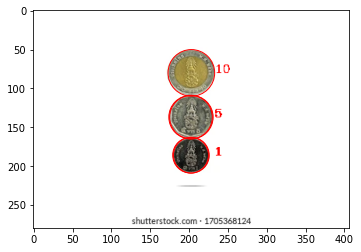

In [345]:
coins = plt.imread('assets/coin_sample5.webp')

for tc in output_thai_coin_manual:
    ratio = tc[2]/min_radius
    x = tc[0]
    y = tc[1]

    for thai_coin in ratio_dict:
        
        if abs(ratio - ratio_dict[thai_coin]) <= tolerance:
                cv2.putText(coins, str(thai_coin), (x+30,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0), 1)
    draw_circle(tc[0], tc[1], tc[2])

plt.imshow(coins)
plt.gca()